## Bike Sharing 

#### Problem Statement:
    
   A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

   A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

   In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

   They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
    
   1. Which variables are significant in predicting the demand for shared bikes.
   2. How well those variables describe the bike demands
   3. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Lets divide the entire process in 8 steps:

-  Step 1. Reading and understanding the data
-  Step 2. Dealing with categorical variables
-  Step 3. Visualising the data
-  Step 4. Data preparation for model
-  Step 5. Performing linear regression
-  Step 6. Residual Analysis of the train data
-  Step 7. Making Predictions on test data using the final model
-  Step 8: Model evaluation
    

## Step 1: Reading and Understanding the Data

In [1]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [3]:
# reading data
boombikes = pd.read_csv('day.csv', parse_dates=True)

In [4]:
# displaying first five rows of data
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#describing data
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking shape of the dataframe boombikes
boombikes.shape

(730, 16)

In [7]:
# Checking info for the boombikes dataframe
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking for null values in data
boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Dropping instant column
boombikes.drop('instant', axis = 1, inplace=True)

Since there are no null values in the dataset proceeding further


## Step 2: Dealing with categorical varaibles

Checking Categorical and numerical columns in the given data set

In [10]:
# Checking numerical columns in the dataset
boombikes.describe().columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

We are getting categorical also into numerical, Since some columns have been modified and encoded as 0 and 1

We know that 'season','yr', 'mnth',,'holiday','weekday','workingday', 'weathersit' columns are categorical.
However, some columns are encoded as 0 and 1 and some other are encoded as 1,2,3.... etc
So converting columns having 1,2,3,4..encoding to categorical and later we can get dummies for these categorical columns

Weathersit description give in the data as 
weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Since the string value for the categories is high, we are converting the numerical to categorical in weathersit column as 

          1: Good 
          2: Fair
          3: Bad
          4: Verybad

In [11]:
# converting the necessary columns to object 

boombikes.season = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

boombikes.mnth = boombikes.mnth.map({1:'Jan', 2:'Feb',3:'Mar', 4: 'Apr', 5:'May', 6:'Jun', 
                                     7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

boombikes.weekday = boombikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

boombikes.weathersit = boombikes.weathersit.map({1:'Good',2: 'Fair', 3: 'Bad', 4: 'Verybad'})

In [12]:
# Checking dataset again whether the changes applied
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,Fair,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Fair,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Checking datatypes
boombikes.dtypes

dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

To get the numerical columns separately, we are converting 'casual', 'registered', 'cnt' columns to float64. 

Also, we are converting dteday column to 'datetime64' dtype

In [15]:
boombikes['dteday'] = boombikes['dteday'].astype('datetime64')
boombikes['casual'] = boombikes['casual'].astype('float64')
boombikes['registered'] = boombikes['registered'].astype('float64')
boombikes['cnt'] = boombikes['cnt'].astype('float64')

In [16]:
# Checking dtypes again
boombikes.dtypes

dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual               float64
registered           float64
cnt                  float64
dtype: object

In [17]:
# Numerical columns in the dataframe
boombikes_numerical = boombikes.select_dtypes(include='float64')
boombikes_numerical.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [18]:
# Categorical columns in dataframe
boombikes_categorical = boombikes.select_dtypes(exclude=['float64','datetime64'])
boombikes_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,Mon,1,Fair
1,spring,0,Jan,0,Tue,1,Fair
2,spring,0,Jan,0,Wed,1,Good
3,spring,0,Jan,0,Thu,1,Good
4,spring,0,Jan,0,Fri,1,Good


## Step 3: Visualizing the data

### Visualising the dist plots for numerical variables

In [19]:
boombikes_numerical.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

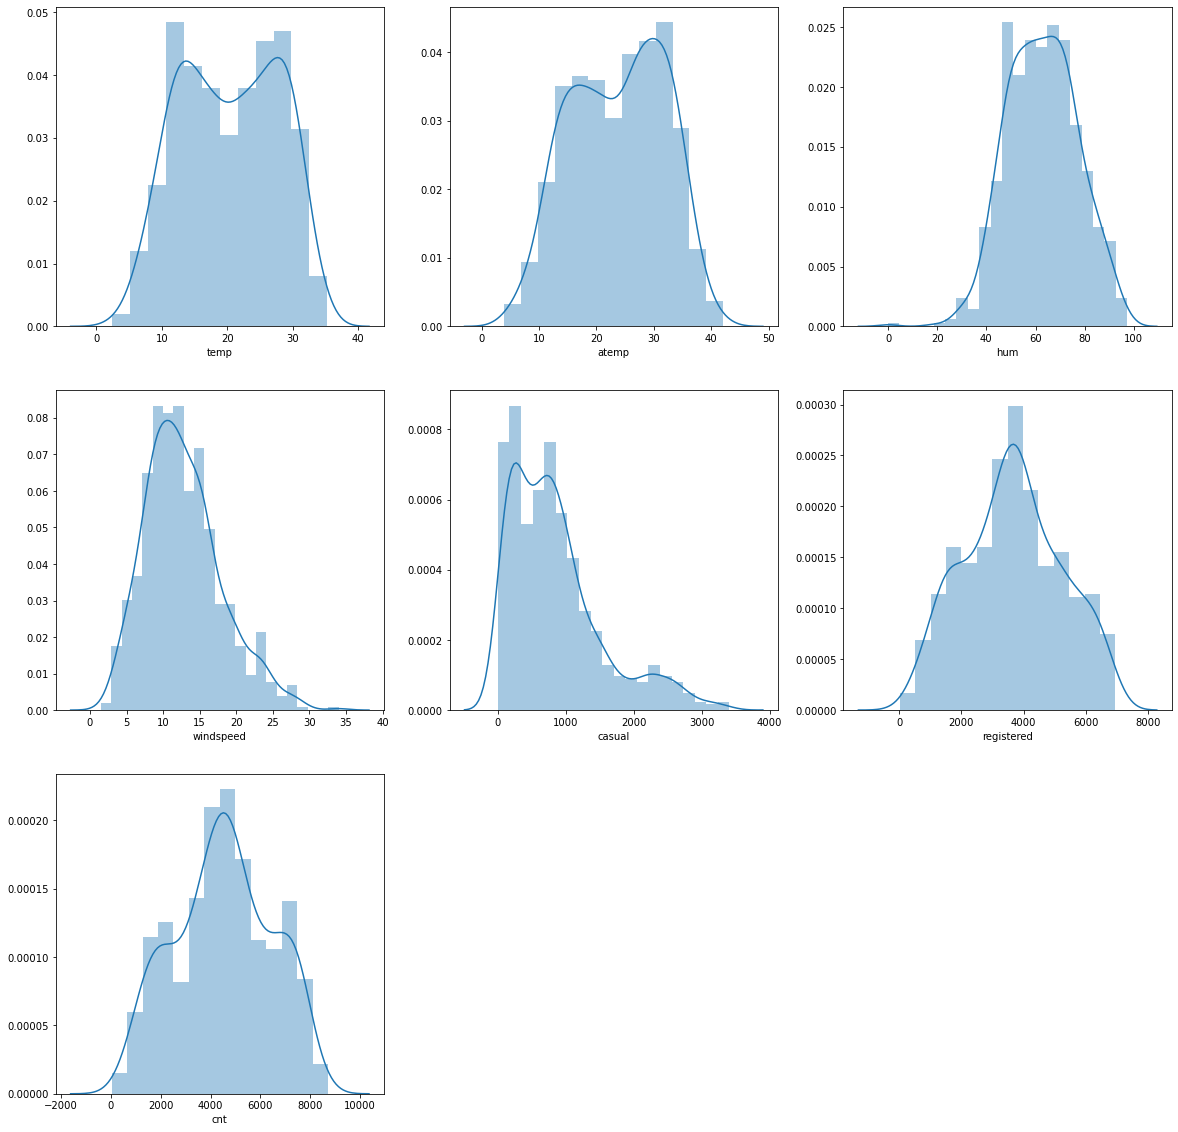

In [20]:
# Distplot for the numerical variables
plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.distplot(boombikes_numerical['temp'])
plt.subplot(3,3,2)
sns.distplot(boombikes_numerical['atemp'])
plt.subplot(3,3,3)
sns.distplot(boombikes_numerical['hum'])
plt.subplot(3,3,4)
sns.distplot(boombikes_numerical['windspeed'])
plt.subplot(3,3,5)
sns.distplot(boombikes_numerical['casual'])
plt.subplot(3,3,6)
sns.distplot(boombikes_numerical['registered'])
plt.subplot(3,3,7)
sns.distplot(boombikes_numerical['cnt'])
plt.show()

Inferences: 
   1. We can see that for temp most of the values lies between 10-30 degrees celsius
   2. For 'atemp' most of the values lies in between 20-40 degerees celsius
   3. For 'hum' most of the values are from 40-75 
   4. For 'windspeed' most of the values are from 7-18
   5. For casual 300-1000 and registered 3000-5000 approximately 
   6. The cnt column highest values is between 3000-5000

### Visualising the box plots for categorical variables vs target variable 'cnt'

In [21]:
boombikes_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

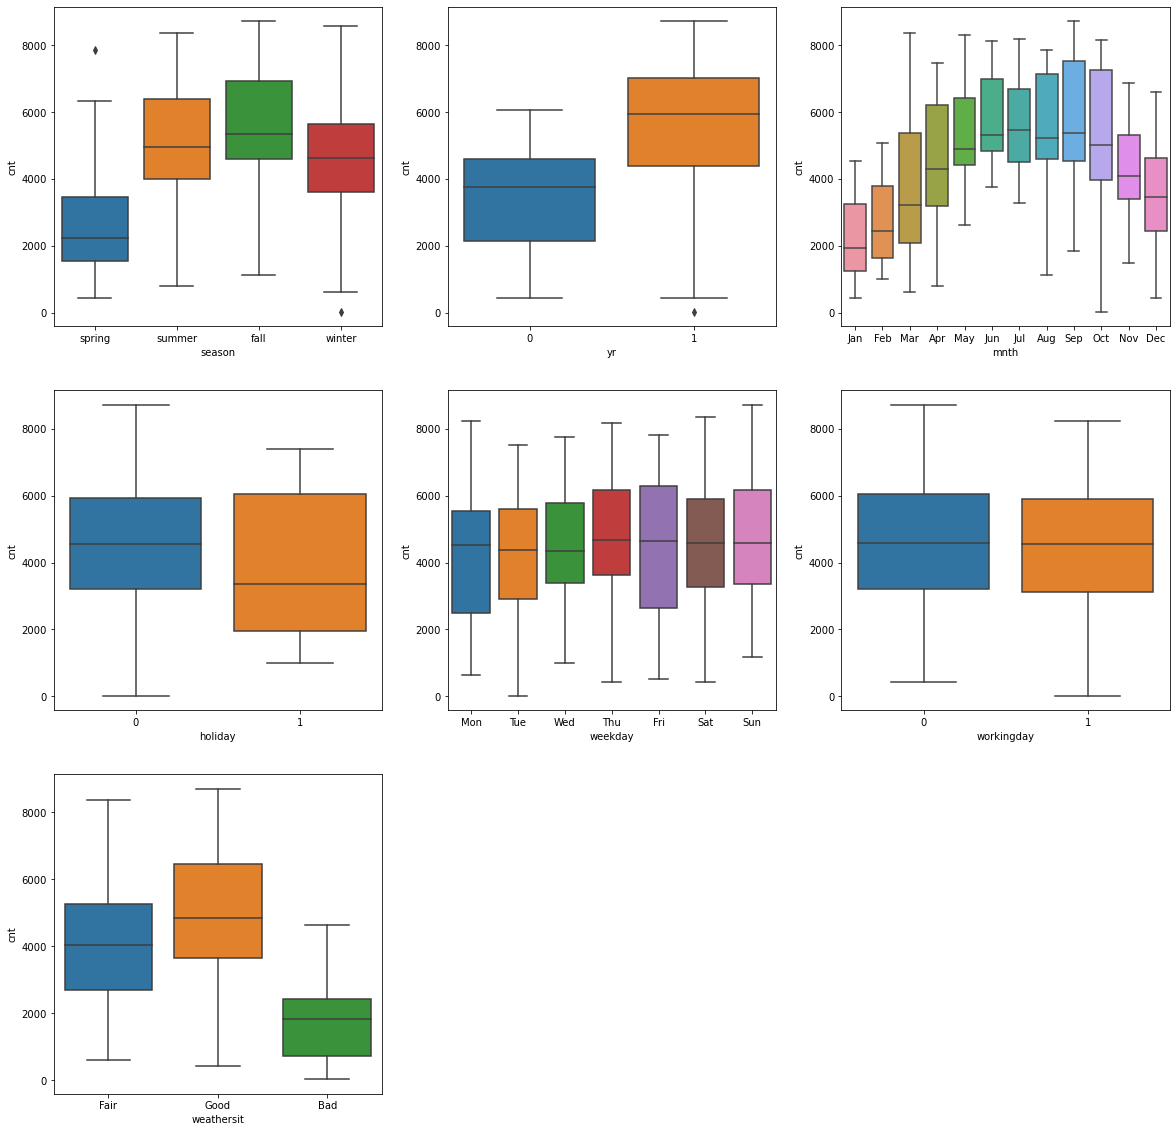

In [22]:
# Visualising box plots for all the categorical columns
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt',data=boombikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data=boombikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt',data=boombikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt',data=boombikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt',data=boombikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt',data=boombikes)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt',data=boombikes)
plt.show()

Inferences:
   1. We can see that the count of total rental bikes are more in the fall, summer and winter season
   2. Also, there is an increase in renting bikes on year 2019 from the yr plot 0- '2018' and 1- '2019'  
   3. We can see that most renting bike bookings happened on workingdays rather than holidays
   4. We can see that most bookings for rental bikes are happened from Thursday to Monday and slightly low on Tuesday and Wednesday
   5. We can also see that the bookings for rental bikes are happening more when the weathersit is good or fair

### Visualising pair plot of numerical columns 

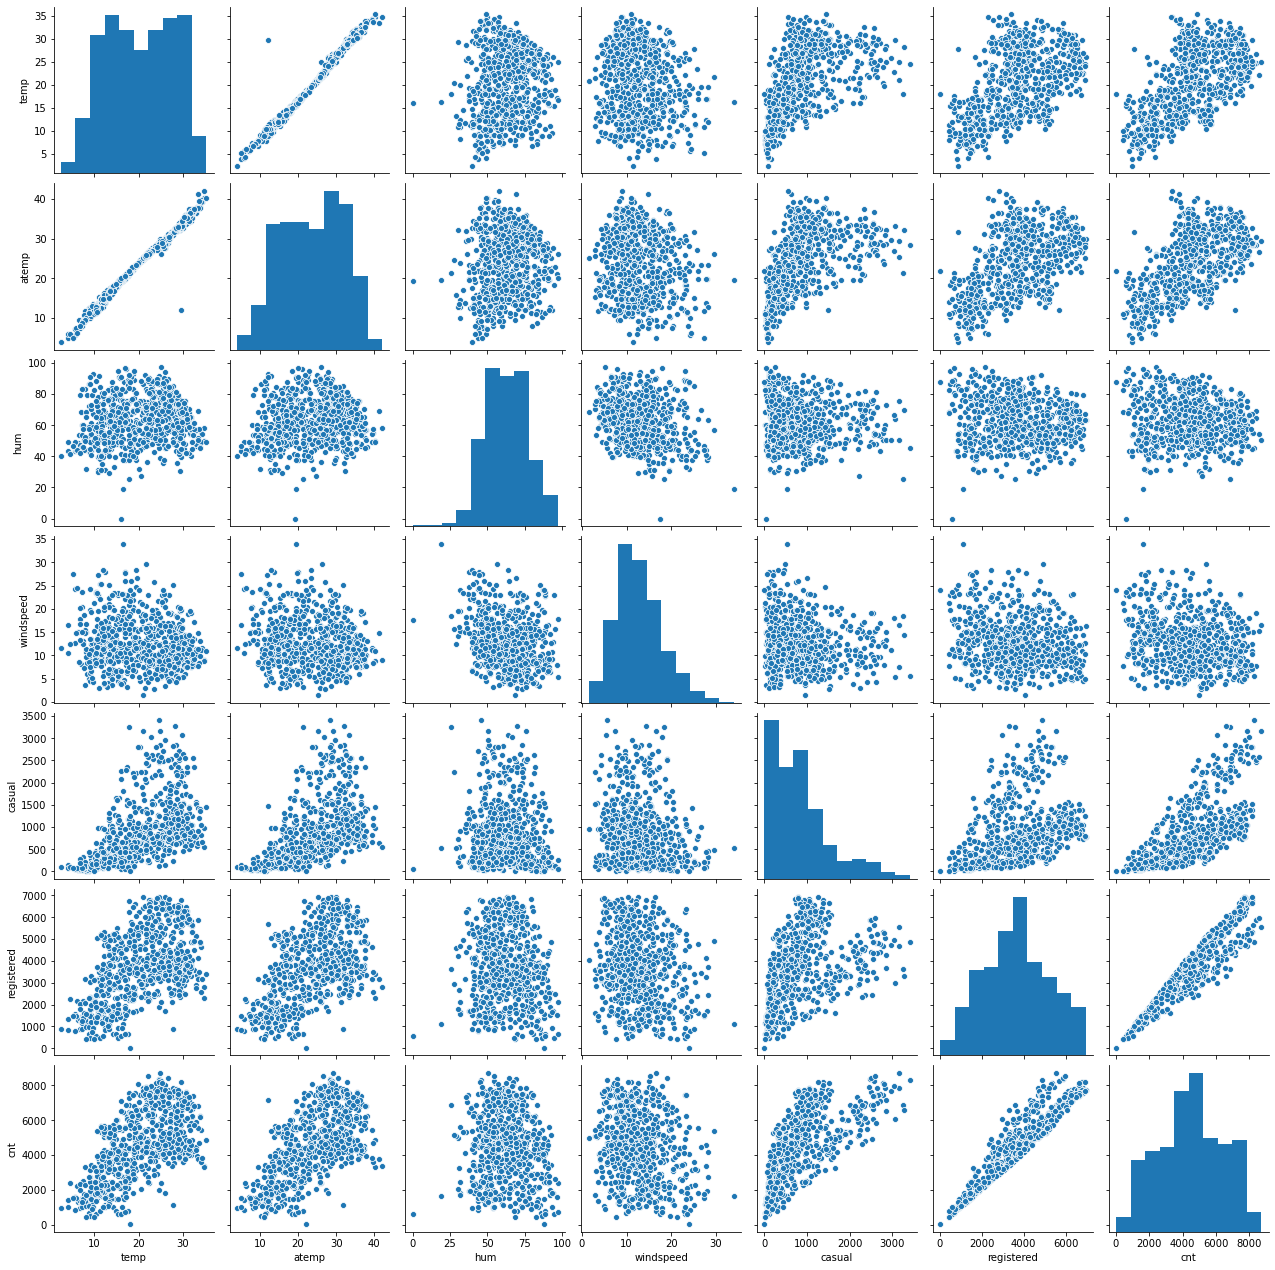

In [23]:
# Visualising pair plot to understand the spread of data with cnt variable. 
sns.pairplot(boombikes_numerical)
plt.show()

### Creating heatmap using correlation

In [24]:
# Correlation for numerical data
cor = boombikes_numerical.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


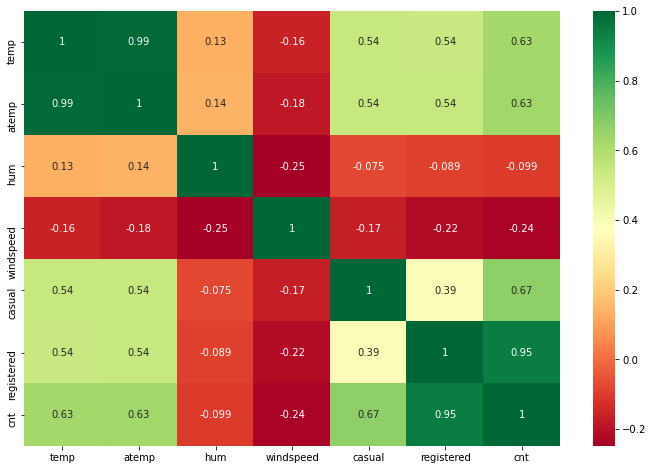

In [25]:
# heatmap for the numerical variables
plt.figure(figsize=[12,8])
sns.heatmap(cor, annot=True,cmap='RdYlGn')
plt.show()

Inferences: 
   1. We can see that 'temp' and 'atemp' column are highly correlated to each other, so we can drop temp column
   2. Also, we can drop registered and casual columns since the cnt column is sum of these 2 columns
   3. We can also see that hum and windspeed are negitively correlated to 'cnt' 

## Step 4: Data Preparation for the model


In [26]:
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,0,Mon,1,Fair,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2018-02-01,spring,0,Jan,0,Tue,1,Fair,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,2018-03-01,spring,0,Jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,2018-04-01,spring,0,Jan,0,Thu,1,Good,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,2018-05-01,spring,0,Jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


In [27]:
# Dropping 'dteday', 'temp', 'casual','registered' from the dataframe
boombikes.drop(['dteday', 'temp', 'casual','registered'], inplace=True, axis=1)

In [28]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Fair,18.18125,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tue,1,Fair,17.68695,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wed,1,Good,9.47025,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thu,1,Good,10.60610,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Fri,1,Good,11.46350,43.6957,12.522300,1600.0


Now we need to create dummies for the categorical columns 'season','mnth','weekday','weathersit' since remaining categorical vairables already encoded to 0s and 1s 

In [29]:
## creating dummies for the features
dummies = ['season','mnth','weekday','weathersit']

featuresdf = pd.get_dummies(data = boombikes[dummies], drop_first=True)
featuresdf.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair,weathersit_Good
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We can see that we got a total of 22 columns in addition to the boombikes data frame.
Merging these featuresdf with boombikes dataframe and dropping 'season','mnth','weekday','weathersit' as we have created the dummies for it

In [30]:
boombikes_final = pd.concat([boombikes, featuresdf], axis = 1)

In [31]:
boombikes_final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair,weathersit_Good
0,spring,0,Jan,0,Mon,1,Fair,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,Fair,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,Good,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,1
3,spring,0,Jan,0,Thu,1,Good,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,1
4,spring,0,Jan,0,Fri,1,Good,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Drop 'season','mnth','weekday','weather_condition' as we have created the dummies for it
boombikes_final.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [33]:
boombikes_final.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Fair', 'weathersit_Good'],
      dtype='object')

In [34]:
len(boombikes_final.columns)

29

Finally we have 29 columns alont with target variable to prepare a model to predict the cnt

In [43]:
boombikes_final.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Fair,weathersit_Good
0,0,0,1,18.18125,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,17.68695,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,11.46350,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 5: Performing  Linear Regression

## Splitting the Data into Training and Testing Sets

In [35]:
# We specify this so that the train and test data set always have the same rows, respectively
boom_train, boom_test = train_test_split(boombikes_final, test_size = 0.20, random_state= 100)

In [36]:
print("boom_train shape: ",boom_train.shape)
print("boom_test shape : ",boom_test.shape)

boom_train shape:  (584, 29)
boom_test shape :  (146, 29)


### Rescaling the Features 


We will use MinMax scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'dummy' variables for train data set
feature_vars = ['atemp', 'hum', 'windspeed', 'cnt']
boom_train[feature_vars] = scaler.fit_transform(boom_train[feature_vars])
boom_test[feature_vars] = scaler.transform(boom_test[feature_vars])

In [39]:
## Creating X_train, y_train from the training dataset
y_train = boom_train.pop('cnt')
X_train = boom_train

In [40]:
## Creating X_test, y_test from the testing dataset
y_test = boom_test.pop('cnt')
X_test = boom_test

### Building our model using sklearn

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Buliding linear model using sklearn library with all the features
lm_sklearn = LinearRegression()
lm_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Cefficients of linear model created using sklearn
coeff_df = pd.DataFrame(lm_sklearn.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
yr,0.229898
holiday,-0.130468
workingday,-0.052276
atemp,0.422786
hum,-0.146963
windspeed,-0.159171
season_spring,-0.063236
season_summer,0.034011
season_winter,0.103950
mnth_Aug,0.039107


In [44]:
print(lm_sklearn.intercept_)

0.14720953026909395


In [45]:
y_pred = lm_sklearn.predict(X_train)

In [46]:
def metrics(model, X, y, y_pred):
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    r_squared = r2_score(y, y_pred)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
    print('r_square: ', r_squared)
    print('adjusted r_square: ', adjusted_r_squared)
    return r_squared, adjusted_r_squared

In [47]:
print("Metrics for sklearn model train data: ",metrics(lm_sklearn,X_train, y_train, y_pred))

Mean Absolute Error: 0.06320507270893992
Mean Squared Error: 0.007465972271532995
Root Mean Squared Error: 0.08640585785427395
r_square:  0.8527108536414582
adjusted r_square:  0.8452800498612074
Metrics for sklearn model train data:  (0.8527108536414582, 0.8452800498612074)


In [48]:
y_pred_test = lm_sklearn.predict(X_test)

In [50]:
print("Metrics for sklearn model test data: ",metrics(lm_sklearn,X_test, y_test, y_pred_test))

Mean Absolute Error: 0.07017097798909638
Mean Squared Error: 0.008676070333430154
Root Mean Squared Error: 0.09314542572467074
r_square:  0.8070074848016868
adjusted r_square:  0.7608212418482444
Metrics for sklearn model test data:  (0.8070074848016868, 0.7608212418482444)


## RFE (Recursive feature elimination)

There are 28 features and we are taking 15 features based on RFE

In [59]:
rfe = RFE(lm_sklearn, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
# columns recommended by rfe method
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Fair', 'weathersit_Good'],
      dtype='object')

In [61]:
# columns removed by rfe method
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Feb', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building Model : 1 using statsmodel, for the detailed statistics

In [62]:
# Importing statsmodels and variance_inflation_factor libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
# Creating functions to build the model and Variance inflation factor calculation
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [64]:
# Columns we got by recursive feature elimination technique
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Fair', 'weathersit_Good'],
      dtype='object')

In [66]:
# Taking columns recommened by RFE as X_train
X_train_1 = X_train[col]
X_train_1.shape

(584, 15)

In [67]:
lm_1 = build_model(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.29e-218
Time:                        17:07:26   Log-Likelihood:                 586.32
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     568   BIC:                            -1071.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0625      0.046     

We can see that R-squared and Adjusted R-squared has a good value


R-squared:                       0.845

Adj. R-squared:                  0.841

Lets check the columns based on the p-value first. 
1. To be a significant variable, the p-value should be less than 0.05
2. From the above summary, we can see that there are no vairables having value > 0.05. 


We can proceed further to check the VIF (Variace inflation factor)

In [68]:
# Checking VIF for lm_1 
checkVIF(X_train_1)

,Features,VIF
3,hum,27.16
2,atemp,23.64
14,weathersit_Good,16.87
13,weathersit_Fair,10.00
5,season_spring,6.31
7,season_winter,4.66
4,windspeed,4.58
6,season_summer,3.73
0,yr,2.11
8,mnth_Aug,1.81


In [69]:
# prediciting using linear model 1
y_pred_lm_1 = lm_1.predict(sm.add_constant(X_train_1))

In [70]:
# metrics for linearmodel 1
metrics(lm_1,X_train_1, y_train,y_pred_lm_1)

Mean Absolute Error: 0.0649739008850682
Mean Squared Error: 0.007861205554999917
Root Mean Squared Error: 0.08866343978777226
r_square:  0.8449136678474137
adjusted r_square:  0.8370894925316076


(0.8449136678474137, 0.8370894925316076)

In [71]:
X_test_1 = X_test[X_train_1.columns]

In [72]:
y_test_pred_lm_1 = lm_1.predict(sm.add_constant(X_test_1))

In [73]:
metrics(lm_1,X_test, y_test,y_test_pred_lm_1)

Mean Absolute Error: 0.07419759467587948
Mean Squared Error: 0.009236835355067712
Root Mean Squared Error: 0.09610845620999076
r_square:  0.794533697960187
adjusted r_square:  0.7453622752498045


(0.794533697960187, 0.7453622752498045)

Dropping 'hum' columns since it has high Variance inflation factor

In [74]:
X_train_2 = X_train_1.drop(['hum'], axis = 1)
X_train_2.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Fair', 'weathersit_Good'],
      dtype='object')

### Building Model : 2 using statsmodel, after removing 'hum' column 

In [75]:
lm_2 = build_model(X_train_2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     213.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.24e-215
Time:                        17:09:19   Log-Likelihood:                 577.03
No. Observations:                 584   AIC:                            -1124.
Df Residuals:                     569   BIC:                            -1059.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0536      0.037     

In [76]:
checkVIF(X_train_2)

,Features,VIF
13,weathersit_Good,16.86
2,atemp,13.64
12,weathersit_Fair,9.57
4,season_spring,4.75
3,windspeed,4.58
6,season_winter,3.49
5,season_summer,3.10
0,yr,2.08
10,mnth_Nov,1.76
7,mnth_Aug,1.74


In [77]:
y_pred_lm_2 = lm_2.predict(sm.add_constant(X_train_2))
metrics(lm_1,X_train_1, y_train,y_pred_lm_1)

Mean Absolute Error: 0.0649739008850682
Mean Squared Error: 0.007861205554999917
Root Mean Squared Error: 0.08866343978777226
r_square:  0.8449136678474137
adjusted r_square:  0.8370894925316076


(0.8449136678474137, 0.8370894925316076)

In [78]:
X_test_2 = X_test[X_train_2.columns]
y_test_pred_lm_2 = lm_2.predict(sm.add_constant(X_test_2))
metrics(lm_2,X_test, y_test,y_test_pred_lm_2)

Mean Absolute Error: 0.0776919224237508
Mean Squared Error: 0.009801946330661058
Root Mean Squared Error: 0.0990047793324194
r_square:  0.7819632387137123
adjusted r_square:  0.7297835009699853


(0.7819632387137123, 0.7297835009699853)

Lets drop weathersit_Fair

In [79]:
X_train_3 = X_train_2.drop('weathersit_Fair', axis = 1)
X_train_3.columns

Index(['yr', 'holiday', 'atemp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov',
       'mnth_Sep', 'weathersit_Good'],
      dtype='object')

### Building Model : 3 using statsmodel, after removing 'weathersit_Fair' column 

In [82]:
lm_3 = build_model(X_train_3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.80e-201
Time:                        17:10:27   Log-Likelihood:                 540.22
No. Observations:                 584   AIC:                            -1052.
Df Residuals:                     570   BIC:                            -991.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1294      0.033     

In [81]:
checkVIF(X_train_3)

,Features,VIF
2,atemp,6.10
3,windspeed,4.52
4,season_spring,2.95
6,season_winter,2.78
12,weathersit_Good,2.75
5,season_summer,2.34
0,yr,2.08
10,mnth_Nov,1.70
7,mnth_Aug,1.65
9,mnth_Jan,1.61


VIF for all the variables are approximately less than 10 and the variables are significant

In [84]:
# Predicting y for train data
y_pred_lm_3 = lm_3.predict(sm.add_constant(X_train_3))
metrics(lm_3,X_train_3, y_train,y_pred_lm_3)

Mean Absolute Error: 0.07034478614585202
Mean Squared Error: 0.00920560891752823
Root Mean Squared Error: 0.09594586451498693
r_square:  0.818391198110503
adjusted r_square:  0.8092289522494112


(0.818391198110503, 0.8092289522494112)

In [85]:
#predicting y for test data
X_test = X_test[X_train_3.columns]
y_test_pred_lm_3 = lm_3.predict(sm.add_constant(X_test))
metrics(lm_3,X_test, y_test,y_test_pred_lm_3)

Mean Absolute Error: 0.07995733488047538
Mean Squared Error: 0.010147896719396117
Root Mean Squared Error: 0.10073676945086196
r_square:  0.7742678382512984
adjusted r_square:  0.7202464662088741


(0.7742678382512984, 0.7202464662088741)

Finally, we arrived at a model where all the variables are significant without multicollinearity and able to explain the variance in train data of 80.9% and for test data 72%. Lets proceed further to check the assumptions of our data

## Step 6: Residual Analysis of the train data


So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_cnt = lm_3.predict(sm.add_constant(X_train_3))

In [88]:
res_train = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

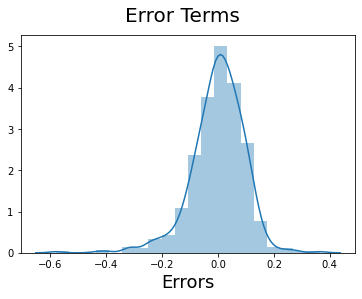

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       

### Checking if there is an Autocorrelation using durbin_watson test

If it is between 1.5 to 2.5, its good. less tahn 1.5 is negative autocorrelation, more than 2.5 is positive autocorrelation. Although 2 is considered as ideal value
The value we got is 2.03 on traind data which is good.

In [101]:
statsmodels.stats.stattools.durbin_watson(res_train)

2.036828516931854

### Error terms have constant variance (homoscedasticity)

It clearly shows that heteroskedasticity assumptions are violated


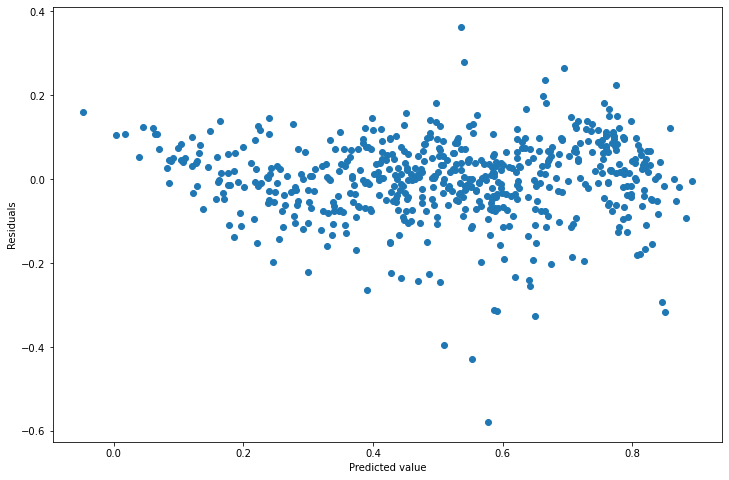

In [122]:
plt.figure(figsize=[12,8])
plt.scatter(y_train_cnt,res_train)
plt.xlabel('Predicted value')
plt.ylabel('Residuals')
print('It clearly shows that heteroskedasticity assumptions are violated')
plt.show()

### Looking for patterns in the residuals

Error terms are independent of each other:

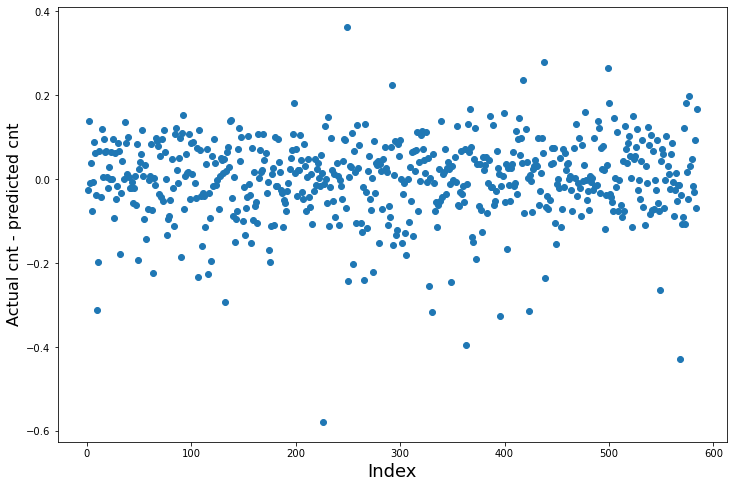

In [119]:
plt.figure(figsize=[12,8])
c = [i for i in range(1,585,1)]
plt.scatter(c,res_train)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual cnt - predicted cnt', fontsize=16)
plt.show()

## Step 7:  Making Predictions on test data using the final model

In [90]:
X_test.head()

,yr,holiday,atemp,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Jan,mnth_Nov,mnth_Sep,weathersit_Good
184,0,1,0.769660,0.084219,0,0,0,0,0,0,0,0,0
535,1,0,0.842587,0.153728,0,1,0,0,0,0,0,0,1
299,0,0,0.496145,0.334206,0,0,1,0,0,0,0,0,0
221,0,0,0.795343,0.339570,0,0,0,1,0,0,0,0,1
152,0,0,0.741471,0.537414,0,1,0,0,0,0,0,0,1


In [91]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
219    0.495168
719    0.414289
3      0.177174
392    0.460308
360    0.131155
Name: cnt, Length: 146, dtype: float64

In [92]:
X_test_new = X_test[X_train_3.columns]

In [93]:
X_test_new = sm.add_constant(X_test_new)

In [94]:
y_test_pred = lm_3.predict(X_test_new)

In [95]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred})
predictions['residuals'] = predictions['Actual'] -predictions['Predicted']
predictions

,Actual,Predicted,residuals
184,0.692706,0.376351,0.316354
535,0.712034,0.879920,-0.167886
299,0.303382,0.407819,-0.104436
221,0.547400,0.575553,-0.028153
152,0.569029,0.537339,0.031690
...,...,...,...
219,0.495168,0.589087,-0.093919
719,0.414289,0.273178,0.141111
3,0.177174,0.164835,0.012339
392,0.460308,0.450483,0.009826


In [109]:
# Metrics for R2 score, Adj R2 score, Mean Absolute Error, etc for test data
X_test_new = X_test[X_train_3.columns]
y_test_pred_lm_3 = lm_3.predict(sm.add_constant(X_test))
metrics(lm_3,X_test, y_test,y_test_pred_lm_3)

Mean Absolute Error: 0.07995733488047538
Mean Squared Error: 0.010147896719396117
Root Mean Squared Error: 0.10073676945086196
r_square:  0.7742678382512984
adjusted r_square:  0.7202464662088741


(0.7742678382512984, 0.7202464662088741)

## Step : 8 Model Evaluation

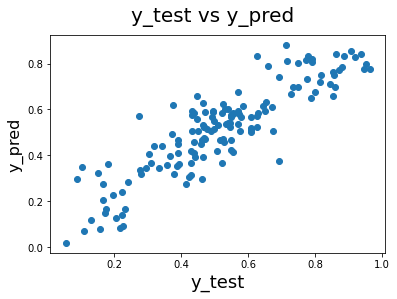

In [111]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

Sorting the parameters with highest coefficients

In [114]:
pd.DataFrame(abs(lm_3.params), columns=['coefficient']).sort_values(by='coefficient', ascending= False)

,coefficient
atemp,0.447624
yr,0.235903
windspeed,0.160069
const,0.129407
season_winter,0.109821
weathersit_Good,0.095925
mnth_Sep,0.086166
holiday,0.084093
season_summer,0.066130
season_spring,0.056691


_1. Which variables are significant in predicting the demand for shared bikes._

>*The following variables are significant in predicting the demand for shared bikes: 
'const', 'yr', 'holiday', 'atemp', 'windspeed', 'season_spring',
'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
'mnth_Nov', 'mnth_Sep', 'weathersit_Good'*
   
**Mainly we should concerntrate on atemp, yr, windspeed.**
   
_2. How well those variables describe the bike demands._
 
  > -  If windspeed is high, the cnt of bookings decreases.
  > -  If atemp increases, the cnt of renting bikes increases.
  > -  For each year, the demand for renting bikes increases.
  > -  If the weathersituation is good and the season is winter or summer, the demand for renting bikes will increase.
  > -  The rental bike bookings count decreases on Nov,Dec and Jan. So, we should concentrate on this months to implement new offers to increase the count of bookings.
  > -  If it is holiday, the bookings might decrease a little since most of the people will not use the renting, we can concentrate more on giving offers and discounts on these days to increase the count of bookings.   
       


We can see that the equation of our best fitted line is:

$ cnt = 0.129 + 0.236  \times  yr - 0.084  \times  holiday + 0.447 \times atemp - 0.160 \times windspeed - 0.056 \times season_spring + 0.0661 \times season_summer + 0.1098 \times season_winter + 0.0485 \times mnth_Aug + 0.0637 \times mnth_Dec - 0.041 \times mnth_Jan - 0.052 \times mnth_Nov + 0.086 \times mnth_Sep + 0.095 \times weathersit_Good $


***Overall we have a decent model***

***For train data:***

r_squared:  0.818

adjusted r_squared:  0.809

***For test data:***

r_squared:  0.774

adjusted r_squared:  0.720 